In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fault = pd.read_csv('data/J1939Faults.csv')
diag = pd.read_csv('data/VehicleDiagnosticOnboardData.csv')
fid = pd.read_excel('data/Service Fault Codes_1_0_0_167.xlsx')


C:\Users\kenny\.jupyter\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
fault = fault[(fault.active == True) & (fault.EquipmentID.astype('str').map(len) <= 5)]


In [4]:
diag = diag.drop(columns='Id').pivot(index='FaultId', columns='Name', values='Value').reset_index()
derate = pd.merge(fault, diag, left_on='RecordID', right_on='FaultId')

In [5]:
fid = fid.rename(columns={'SPN': 'spn', 'J1939 FMI': 'fmi'})
derate = pd.merge(derate, fid, on=['spn','fmi'])
fid.columns

Index(['Published in CES 14602', 'Cummins Fault Code', 'Revision', 'PID',
       'SID', 'MID', 'J1587 FMI', 'spn', 'fmi', 'J2012 Pcode', 'Lamp Color',
       'Lamp Device', 'Cummins Description', 'Algorithm Description'],
      dtype='object')

In [6]:
derate.columns

Index(['RecordID', 'ESS_Id', 'EventTimeStamp', 'eventDescription',
       'actionDescription', 'ecuSoftwareVersion', 'ecuSerialNumber',
       'ecuModel', 'ecuMake', 'ecuSource', 'spn', 'fmi', 'active',
       'activeTransitionCount', 'faultValue', 'EquipmentID', 'MCTNumber',
       'Latitude', 'Longitude', 'LocationTimeStamp', 'FaultId',
       'AcceleratorPedal', 'BarometricPressure', 'CruiseControlActive',
       'CruiseControlSetSpeed', 'DistanceLtd', 'EngineCoolantTemperature',
       'EngineLoad', 'EngineOilPressure', 'EngineOilTemperature', 'EngineRpm',
       'EngineTimeLtd', 'FuelLevel', 'FuelLtd', 'FuelRate', 'FuelTemperature',
       'IgnStatus', 'IntakeManifoldTemperature', 'LampStatus', 'ParkingBrake',
       'ServiceDistance', 'Speed', 'SwitchedBatteryVoltage', 'Throttle',
       'TurboBoostPressure', 'Published in CES 14602', 'Cummins Fault Code',
       'Revision', 'PID', 'SID', 'MID', 'J1587 FMI', 'J2012 Pcode',
       'Lamp Color', 'Lamp Device', 'Cummins Description'

In [7]:
derate = derate[['RecordID', 'EventTimeStamp', 'spn','fmi','faultValue','Latitude', 'Longitude', 'EquipmentID',
                'LocationTimeStamp','Lamp Color','Lamp Device','AcceleratorPedal', 'BarometricPressure',
       'CruiseControlActive', 'CruiseControlSetSpeed', 'DistanceLtd',
       'EngineCoolantTemperature', 'EngineLoad', 'EngineOilPressure',
       'EngineOilTemperature', 'EngineRpm', 'EngineTimeLtd', 'FuelLevel',
       'FuelLtd', 'FuelRate', 'FuelTemperature', 'IgnStatus',
       'IntakeManifoldTemperature', 'LampStatus', 'ParkingBrake',
       'ServiceDistance', 'Speed', 'SwitchedBatteryVoltage', 'Throttle',
       'TurboBoostPressure']]


In [8]:
derate = derate.fillna(method='ffill').fillna(method='bfill')

In [9]:
derate.LampStatus.nunique()

28

In [10]:
# derate = derate[(derate['Latitude'] != 36.0666667) & (derate['Longitude'] != -86.4347222)]
# derate = derate[(derate['Latitude'] != 35.5883333) & (derate['Longitude'] != -86.4438888)]
# derate = derate[(derate['Latitude'] != 36.1950) & (derate['Longitude'] != -83.174722)]
derate['lat_r']=derate['Latitude'].round(decimals = 1)
derate['lon_r']=derate['Longitude'].round(decimals=1)

derate=derate[(derate['lat_r']!=36.1) & (derate['lon_r']!= -86.4)]
derate=derate[(derate['lat_r']!=35.6) & (derate['lon_r']!= -86.4)]
derate=derate[(derate['lat_r']!=36.2) & (derate['lon_r']!= -83.2)]

In [11]:
derate.shape

(509811, 37)

In [12]:
derate['derate_full'] = (derate['spn'] == 5246).astype('int')
derate['derate_partial'] = pd.concat([derate['spn'] == 1569, derate['fmi'] == 31], axis=1).all(axis=1).astype('int')

In [13]:
derate = derate[['faultValue', 'Latitude','Longitude', 'EquipmentID', 'spn', 'fmi',
        'EventTimeStamp','AcceleratorPedal', 'BarometricPressure',
       'CruiseControlActive', 'CruiseControlSetSpeed', 'DistanceLtd',
       'EngineCoolantTemperature', 'EngineLoad', 'EngineOilPressure',
       'EngineOilTemperature', 'EngineRpm', 'EngineTimeLtd', 'FuelLevel',
       'FuelLtd', 'FuelRate', 'FuelTemperature', 'IgnStatus',
       'IntakeManifoldTemperature', 'LampStatus', 'ParkingBrake',
       'ServiceDistance', 'Speed', 'SwitchedBatteryVoltage', 'Throttle',
       'TurboBoostPressure', 'derate_full', 'derate_partial']]

In [14]:
derate.shape

(509811, 33)

In [15]:
q = derate[['EventTimeStamp','AcceleratorPedal', 'BarometricPressure',
       'CruiseControlActive', 'CruiseControlSetSpeed', 'DistanceLtd',
       'EngineCoolantTemperature', 'EngineLoad', 'EngineOilPressure',
       'EngineOilTemperature', 'EngineRpm', 'EngineTimeLtd', 'FuelLevel',
       'FuelLtd', 'FuelRate', 'FuelTemperature', 'IgnStatus',
       'IntakeManifoldTemperature', 'LampStatus', 'ParkingBrake',
       'ServiceDistance', 'Speed', 'SwitchedBatteryVoltage', 'Throttle',
       'TurboBoostPressure', 'derate_full']]
# numbers = list(derate.drop(columns = datetimes + strings + booleans).columns)
# derate[numbers] = (derater[numbers]
#                     .replace(',','.', regex=True)
#                     .apply(pd.to_numeric))
#boolean = q[['CruiseControlActive', 'IgnStatus', 'ParkingBrake']].astype('int64')
booleans = ['CruiseControlActive', 'IgnStatus', 'ParkingBrake']
q[booleans] = (q[booleans].replace("True", 1).replace("False", -1).astype('int'))
q.head()

q = (q.drop(columns=['EventTimeStamp'])
                    .replace(',','.', regex=True)
                    .apply(pd.to_numeric))

C:\Users\kenny\.jupyter\Anaconda\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [16]:
derate.spn.value_counts()

111       310712
96         40055
524287     33345
639        25268
97         18802
629        15089
1569        4531
1761        4185
3226        4111
3464        3993
3216        3889
1231        3602
641         3404
91          3298
3251        2015
412         1742
630         1650
171         1519
3610        1266
102         1254
157         1242
110         1238
4364        1218
168          911
1209         692
3031         680
5848         658
101          645
1807         643
4339         634
           ...  
98             3
3512           3
729            3
38             3
3227           3
167            3
4766           3
3695           2
1235           2
7321           2
709            2
3521           2
633            2
1659           2
5853           2
4752           2
127            2
1081           1
442            1
173            1
521032         1
7323           1
3514           1
6780           1
2579           1
174            1
5321           1
2630          

In [17]:
derate['EventTimeStamp'] = derate['EventTimeStamp'].astype('datetime64')

In [18]:
derate['hour'] = derate.apply(lambda x:x['EventTimeStamp'].hour, axis=1)
derate['day'] = derate.apply(lambda x:x['EventTimeStamp'].day, axis=1)
derate['month'] = derate.apply(lambda x:x['EventTimeStamp'].month, axis=1)
derate['year'] = derate.apply(lambda x:x['EventTimeStamp'].year, axis=1)

In [19]:
derate['hr_sin'] = np.sin(derate['hour']*(2.*np.pi/24))
derate['hr_cos'] = np.cos(derate['hour']*(2.*np.pi/24))
derate['day_sin'] = np.sin((derate['day'])*(2.*np.pi/7))
derate['day_cos'] = np.cos((derate['day'])*(2.*np.pi/7))
derate['month_sin'] = np.sin((derate['month']-1)*(2.*np.pi/12))
derate['month_cos'] = np.cos((derate['month']-1)*(2.*np.pi/12))
derate['year_sin'] = np.sin((derate['year'])*(2.*np.pi/1))
derate['year_cos'] = np.cos((derate['year'])*(2.*np.pi/1))

In [20]:
derate[derate['derate_full'] == 1]

,faultValue,Latitude,Longitude,EquipmentID,spn,fmi,EventTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,...,month,year,hr_sin,hr_cos,day_sin,day_cos,month_sin,month_cos,year_sin,year_cos
399931,NaN,40.733009,-74.087777,1630,5246,0,2015-02-23 05:05:44,100,14.5,True,...,2,2015,9.659258e-01,2.588190e-01,9.749279e-01,-0.222521,5.000000e-01,8.660254e-01,-4.722164e-13,1.0
399932,NaN,28.077361,-81.897083,1487,5246,0,2015-02-23 15:54:22,100,14.5,True,...,2,2015,-7.071068e-01,-7.071068e-01,9.749279e-01,-0.222521,5.000000e-01,8.660254e-01,-4.722164e-13,1.0
399933,NaN,39.399583,-82.974768,1329,5246,0,2015-02-25 13:53:08,100,14.5,True,...,2,2015,-2.588190e-01,-9.659258e-01,-4.338837e-01,-0.900969,5.000000e-01,8.660254e-01,-4.722164e-13,1.0
399934,NaN,37.596805,-85.865555,1419,5246,0,2015-02-26 22:24:29,100,14.5,False,...,2,2015,-5.000000e-01,8.660254e-01,-9.749279e-01,-0.222521,5.000000e-01,8.660254e-01,-4.722164e-13,1.0
399935,NaN,40.534259,-76.431805,1486,5246,0,2015-02-27 09:09:56,100,14.5,False,...,2,2015,7.071068e-01,-7.071068e-01,-7.818315e-01,0.623490,5.000000e-01,8.660254e-01,-4.722164e-13,1.0
399936,NaN,41.225879,-77.074907,1486,5246,0,2015-02-27 12:45:34,100,14.5,False,...,2,2015,1.224647e-16,-1.000000e+00,-7.818315e-01,0.623490,5.000000e-01,8.660254e-01,-4.722164e-13,1.0
399937,NaN,41.033333,-77.515648,1486,5246,0,2015-02-27 16:52:12,0,14.5,False,...,2,2015,-8.660254e-01,-5.000000e-01,-7.818315e-01,0.623490,5.000000e-01,8.660254e-01,-4.722164e-13,1.0
399938,NaN,39.942777,-82.021666,1509,5246,0,2015-03-04 08:10:53,0,14.5,False,...,3,2015,8.660254e-01,-5.000000e-01,-4.338837e-01,-0.900969,8.660254e-01,5.000000e-01,-4.722164e-13,1.0
399940,NaN,34.607870,-92.532916,1492,5246,0,2015-03-18 07:20:37,0,14.5,False,...,3,2015,9.659258e-01,-2.588190e-01,-4.338837e-01,-0.900969,8.660254e-01,5.000000e-01,-4.722164e-13,1.0
399941,NaN,34.782361,-92.125046,1492,5246,0,2015-03-18 22:34:13,0,14.5,False,...,3,2015,-5.000000e-01,8.660254e-01,-4.338837e-01,-0.900969,8.660254e-01,5.000000e-01,-4.722164e-13,1.0


In [21]:
l = derate[derate.derate_full == 1]
d = l.groupby(['EquipmentID'])['EventTimeStamp'].agg(['min', 'max'])
derate = pd.merge(derate, d, left_on='EquipmentID', right_index=True, how='left')

In [22]:
derate['max_diff'] = (derate['max'] - derate['EventTimeStamp'])
derate['max_diff'] = derate.max_diff.apply(lambda x:x.days)


In [23]:
derate.head()

,faultValue,Latitude,Longitude,EquipmentID,spn,fmi,EventTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,...,hr_cos,day_sin,day_cos,month_sin,month_cos,year_sin,year_cos,min,max,max_diff
0,NaN,38.857638,-84.626851,1439,111,17,2015-02-21 10:47:13,0,14.21,False,...,-0.866025,-7.347881e-16,1.0,0.5,0.866025,-4.722164e-13,1.0,NaT,NaT,NaN
1,NaN,38.857638,-84.626851,1439,111,17,2015-02-21 10:47:13,0,14.21,False,...,-0.866025,-7.347881e-16,1.0,0.5,0.866025,-4.722164e-13,1.0,NaT,NaT,NaN
2,NaN,33.043564,-96.179722,1417,111,17,2015-02-21 11:40:22,48,14.4275,False,...,-0.965926,-7.347881e-16,1.0,0.5,0.866025,-4.722164e-13,1.0,NaT,NaT,NaN
3,NaN,33.043564,-96.179722,1417,111,17,2015-02-21 11:40:22,48,14.4275,False,...,-0.965926,-7.347881e-16,1.0,0.5,0.866025,-4.722164e-13,1.0,NaT,NaT,NaN
6,NaN,38.228796,-84.582500,1429,111,17,2015-02-21 11:40:22,82.8,14.2825,False,...,-0.965926,-7.347881e-16,1.0,0.5,0.866025,-4.722164e-13,1.0,NaT,NaT,NaN


In [24]:
d = pd.DataFrame(derate.groupby(['EquipmentID', 'year','month','day'])['derate_full'].max())
d = d.rename(columns={'derate_full': 'derate_full_in_24h'})


In [25]:
derate = pd.merge(derate, d, left_on=['EquipmentID', 'year','month','day'], right_index=True)

In [26]:
derate.derate_full_in_24h.value_counts()

0    507172
1      2639
Name: derate_full_in_24h, dtype: int64

In [27]:
derate[booleans] = (derate[booleans].replace("True", 1).replace("False", -1).astype('int'))


In [28]:
# derate = derate.groupby('EquipmentID').fillna(method='ffill')
# derate = derate.groupby('EquipmentID').fillna(method='bfill')

In [119]:
features = ['BarometricPressure', 'DistanceLtd','EngineCoolantTemperature', 'EngineLoad', 'EngineOilPressure',
       'EngineOilTemperature', 'EngineRpm', 'EngineTimeLtd','FuelLtd', 'FuelRate', 
       'IntakeManifoldTemperature', 'Speed', 'TurboBoostPressure']
derate[features] = (derate[features]
                    .replace(',','.', regex=True)
                    .apply(pd.to_numeric))
der2 = derate
der2 = der2[der2.spn != 5246]
der2 = pd.concat([der2, pd.get_dummies(der2.LampStatus)], axis=1)
der2 = der2.rename(columns={0: 'none'})
# der2['spn_fmi'] = der2.spn.astype('str') + der2.fmi.astype('str')
der2 = pd.concat([der2, pd.get_dummies(der2.fmi)], axis=1)
der2 = der2.rename(columns={0: 'none3'})
der2 = pd.concat([der2, pd.get_dummies(der2.spn)], axis=1)
der2 = der2.rename(columns={0: 'none2'})

In [128]:
# der2 = pd.concat([der2, pd.get_dummies(der2.spn_fmi)], axis=1)
# der2 = der2.drop(columns=['spn_fmi'])
# der2 = der2.rename(columns={0: 'none2'})


In [129]:
for ff in features:
    tt = der2.groupby(['EquipmentID', 'year','month','day'])[ff].agg(['min', 'max', 'mean', 'sum', 'std'])
    tt = tt.rename(columns={'min' : 'min_'+str(ff), 'max' : 'max_'+str(ff), 'mean': 'mean_'+str(ff), 'sum': 'sum_'+str(ff), 'std': 'std_'+str(ff)})
    der2 = pd.merge(der2, tt, left_on = ['EquipmentID', 'year','month','day'], right_index=True)
    der2['diff_min_'+str(ff)] = der2[ff] - der2['min_'+str(ff)] 
    der2['diff_max_'+str(ff)] = der2['max_'+str(ff)] - der2[ff]
    der2['diff_mean_'+str(ff)] = der2[ff] - der2['mean_'+str(ff)]

In [130]:
der2['key'] = der2['EquipmentID'].astype('str') + '_' + der2['EventTimeStamp'].dt.date.astype('str')

In [131]:
der2 = der2.loc[:,~der2.columns.duplicated()]
key_unique = der2['key'].unique()


In [132]:
from sklearn.model_selection import train_test_split
train_keys, test_keys = train_test_split(key_unique)

In [133]:
train = der2[der2.key.isin(train_keys)]
test = der2[der2.key.isin(test_keys)]

In [134]:
train = der2[der2.year <= 2018]
test = der2[der2.year > 2018]
forcast_2019 = der2[der2.year > 2018]

In [135]:

train = (train.drop(columns=['EquipmentID', 'spn', 'fmi', 'key',
        'EventTimeStamp','faultValue', 'Latitude', 'Longitude','min', 'max','derate_full', 'derate_partial','LampStatus'])
        .replace(',','.', regex=True)
        .apply(pd.to_numeric)).fillna(0)

test = (test.drop(columns=['EquipmentID', 'spn', 'fmi', 'key',
        'EventTimeStamp','faultValue', 'Latitude', 'Longitude','min', 'max','derate_full', 'derate_partial','LampStatus'])
        .replace(',','.', regex=True)
        .apply(pd.to_numeric)).fillna(0)

In [136]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train = train.drop(columns=['derate_full_in_24h'])
y_train = train['derate_full_in_24h']

X_test = test.drop(columns=['derate_full_in_24h'])
y_test = test['derate_full_in_24h']


In [137]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(k_neighbors=5, n_jobs=-1, random_state=321)
X_smote, y_smote = oversampler.fit_resample(X_train, y_train)

In [138]:


xg_class = xgb.XGBRFClassifier(colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 100, n_jobs=-1)
xg_class.fit(X_smote, y_smote, verbose=5)

y_pred = xg_class.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9848951838693739

In [139]:
metrics.confusion_matrix(y_test, y_pred)

array([[41760,   540],
       [  102,   101]], dtype=int64)

In [140]:
from sklearn.metrics import f1_score, classification_report, roc_auc_score

f1_score(y_test, y_pred)

0.23933649289099526

In [141]:
roc_auc_score(y_test,xg_class.predict_proba(X_test)[:,1])

0.9678479427965856

In [142]:
y_test.value_counts()

0    42300
1      203
Name: derate_full_in_24h, dtype: int64

In [143]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     42300
           1       0.16      0.50      0.24       203

    accuracy                           0.98     42503
   macro avg       0.58      0.74      0.62     42503
weighted avg       0.99      0.98      0.99     42503



In [144]:
import matplotlib.pyplot as plt
xg_class.feature_importances_ 
importances = pd.DataFrame({'feature':X_test.columns, 'importance':xg_class.feature_importances_}).sort_values('importance', ascending =False)
importances

,feature,importance
37,1023,0.213973
105,111,0.097319
80,17,0.096884
324,min_EngineRpm,0.023563
298,diff_max_EngineCoolantTemperature,0.022363
337,diff_min_EngineTimeLtd,0.018082
361,diff_min_IntakeManifoldTemperature,0.016627
44,18431,0.016491
132,629,0.015314
75,12,0.013637


In [145]:
f = pd.merge(X_test, pd.DataFrame(y_pred), left_index=True, right_index=True)
f = f.rename(columns={0: 'y_pred'})
f = pd.merge(f, pd.DataFrame(y_test), left_index=True, right_index=True)

In [146]:
X_train.columns

Index([            'AcceleratorPedal',           'BarometricPressure',
                'CruiseControlActive',        'CruiseControlSetSpeed',
                        'DistanceLtd',     'EngineCoolantTemperature',
                         'EngineLoad',            'EngineOilPressure',
               'EngineOilTemperature',                    'EngineRpm',
       ...
                     'diff_max_Speed',              'diff_mean_Speed',
             'min_TurboBoostPressure',       'max_TurboBoostPressure',
            'mean_TurboBoostPressure',       'sum_TurboBoostPressure',
             'std_TurboBoostPressure',  'diff_min_TurboBoostPressure',
        'diff_max_TurboBoostPressure', 'diff_mean_TurboBoostPressure'],
      dtype='object', length=380)

In [147]:
df = derate[derate.spn == 5246]
df.columns

Index(['faultValue', 'Latitude', 'Longitude', 'EquipmentID', 'spn', 'fmi',
       'EventTimeStamp', 'AcceleratorPedal', 'BarometricPressure',
       'CruiseControlActive', 'CruiseControlSetSpeed', 'DistanceLtd',
       'EngineCoolantTemperature', 'EngineLoad', 'EngineOilPressure',
       'EngineOilTemperature', 'EngineRpm', 'EngineTimeLtd', 'FuelLevel',
       'FuelLtd', 'FuelRate', 'FuelTemperature', 'IgnStatus',
       'IntakeManifoldTemperature', 'LampStatus', 'ParkingBrake',
       'ServiceDistance', 'Speed', 'SwitchedBatteryVoltage', 'Throttle',
       'TurboBoostPressure', 'derate_full', 'derate_partial', 'hour', 'day',
       'month', 'year', 'hr_sin', 'hr_cos', 'day_sin', 'day_cos', 'month_sin',
       'month_cos', 'year_sin', 'year_cos', 'min', 'max', 'max_diff',
       'derate_full_in_24h'],
      dtype='object')

In [148]:
df = df[df.year > 2018]
df = df.drop_duplicates(subset=['EquipmentID','Latitude', 'Longitude','year','month','day']).sort_values(by='EventTimeStamp').reset_index(drop=True)
df['rolling_cost'] = (df.index+1)*4000
df


,faultValue,Latitude,Longitude,EquipmentID,spn,fmi,EventTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,...,day_cos,month_sin,month_cos,year_sin,year_cos,min,max,max_diff,derate_full_in_24h,rolling_cost
0,NaN,34.698842,-81.938148,1698,5246,0,2019-01-13 21:21:37,0,14.4275,-1,...,0.623490,0.000000e+00,1.000000e+00,3.510335e-13,1.0,2019-01-13 21:21:37,2019-01-13 21:21:37,0.0,1,4000
1,NaN,39.950324,-83.339259,1827,5246,0,2019-01-21 09:01:38,0,14.3550,-1,...,1.000000,0.000000e+00,1.000000e+00,3.510335e-13,1.0,2019-01-21 09:01:38,2019-01-21 09:01:38,0.0,1,8000
2,NaN,34.118425,-84.741805,1857,5246,0,2019-01-25 10:06:17,0,14.3550,-1,...,-0.900969,0.000000e+00,1.000000e+00,3.510335e-13,1.0,2019-01-25 10:06:17,2019-01-25 13:27:36,0.0,1,12000
3,NaN,35.145972,-86.578981,1857,5246,0,2019-01-25 13:27:36,0,14.4275,-1,...,-0.900969,0.000000e+00,1.000000e+00,3.510335e-13,1.0,2019-01-25 10:06:17,2019-01-25 13:27:36,0.0,1,16000
4,NaN,30.478379,-90.460740,1758,5246,0,2019-01-29 22:35:39,0,14.7900,-1,...,0.623490,0.000000e+00,1.000000e+00,3.510335e-13,1.0,2018-10-29 06:41:12,2019-02-06 02:31:49,7.0,1,20000
5,NaN,35.137592,-90.487824,1758,5246,0,2019-01-31 21:23:21,0,14.7175,-1,...,-0.900969,0.000000e+00,1.000000e+00,3.510335e-13,1.0,2018-10-29 06:41:12,2019-02-06 02:31:49,5.0,1,24000
6,NaN,33.829120,-93.396157,1758,5246,0,2019-02-01 02:42:48,0,14.5725,-1,...,0.623490,5.000000e-01,8.660254e-01,3.510335e-13,1.0,2018-10-29 06:41:12,2019-02-06 02:31:49,4.0,1,28000
7,NaN,32.601574,-95.921064,1918,5246,0,2019-02-05 03:22:15,0,14.2825,-1,...,-0.222521,5.000000e-01,8.660254e-01,3.510335e-13,1.0,2019-02-05 03:22:15,2019-02-05 03:22:15,0.0,1,32000
8,NaN,39.725555,-86.220231,1758,5246,0,2019-02-05 19:59:02,0,14.2825,-1,...,-0.222521,5.000000e-01,8.660254e-01,3.510335e-13,1.0,2018-10-29 06:41:12,2019-02-06 02:31:49,0.0,1,36000
9,NaN,38.491666,-85.769027,1758,5246,0,2019-02-06 02:31:49,0,14.3550,-1,...,0.623490,5.000000e-01,8.660254e-01,3.510335e-13,1.0,2018-10-29 06:41:12,2019-02-06 02:31:49,0.0,1,40000


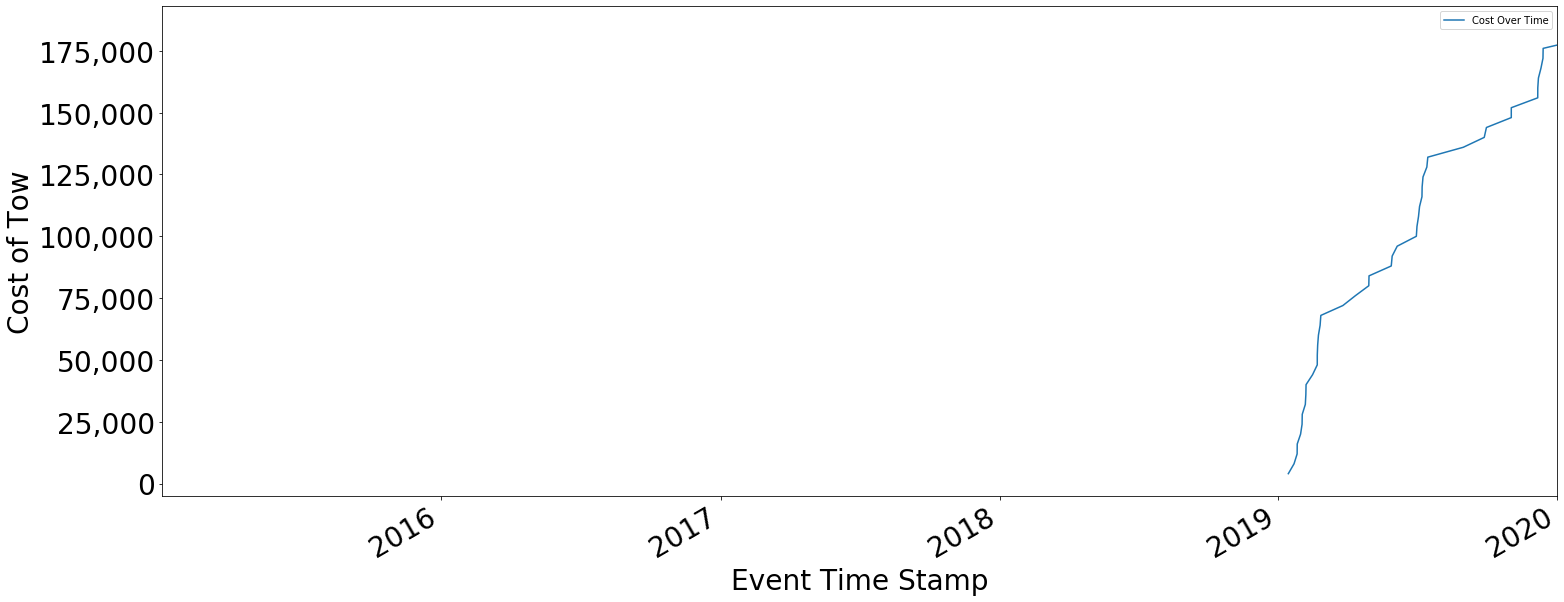

In [149]:
import matplotlib as mpl
f, ax = plt.subplots(figsize=(25, 10))
df = df.rename(columns={'rolling_cost': 'Cost Over Time'})
df.plot('EventTimeStamp', 'Cost Over Time', ax=ax)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlim('2015-01-01 00:03:23','2020-01-01 00:03:23')

ax.set_ylabel('Cost of Tow', fontsize=28)
ax.set_xlabel('Event Time Stamp', fontsize=28)
ax.tick_params(axis='both', labelsize=28)
plt.savefig('cost_trend.png', dpi = 250);

In [150]:
df.head().head()


,faultValue,Latitude,Longitude,EquipmentID,spn,fmi,EventTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,...,day_cos,month_sin,month_cos,year_sin,year_cos,min,max,max_diff,derate_full_in_24h,Cost Over Time
0,NaN,34.698842,-81.938148,1698,5246,0,2019-01-13 21:21:37,0,14.4275,-1,...,0.623490,0.0,1.0,3.510335e-13,1.0,2019-01-13 21:21:37,2019-01-13 21:21:37,0.0,1,4000
1,NaN,39.950324,-83.339259,1827,5246,0,2019-01-21 09:01:38,0,14.3550,-1,...,1.000000,0.0,1.0,3.510335e-13,1.0,2019-01-21 09:01:38,2019-01-21 09:01:38,0.0,1,8000
2,NaN,34.118425,-84.741805,1857,5246,0,2019-01-25 10:06:17,0,14.3550,-1,...,-0.900969,0.0,1.0,3.510335e-13,1.0,2019-01-25 10:06:17,2019-01-25 13:27:36,0.0,1,12000
3,NaN,35.145972,-86.578981,1857,5246,0,2019-01-25 13:27:36,0,14.4275,-1,...,-0.900969,0.0,1.0,3.510335e-13,1.0,2019-01-25 10:06:17,2019-01-25 13:27:36,0.0,1,16000
4,NaN,30.478379,-90.460740,1758,5246,0,2019-01-29 22:35:39,0,14.7900,-1,...,0.623490,0.0,1.0,3.510335e-13,1.0,2018-10-29 06:41:12,2019-02-06 02:31:49,7.0,1,20000


In [151]:
pp = pd.DataFrame(xg_class.predict(test.drop(columns='derate_full_in_24h')))
der3 = pd.concat([forcast_2019.reset_index(drop=True), pp], axis=1)

In [152]:
der3 = der3.rename(columns ={0:'Predicted Values'})

In [153]:
der3 = der3.groupby(['EquipmentID', 'year','month','day'])['Predicted Values'].max().reset_index()

In [154]:
y_test2 = pd.concat([forcast_2019, pd.DataFrame(y_pred)], axis=1, ignore_index=True)

In [155]:
forcast_2019['pred'] = y_pred

C:\Users\kenny\.jupyter\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [156]:
forcast_2019.shape

(42503, 395)

In [157]:
test.shape

(42503, 381)

In [158]:
test2 = forcast_2019.groupby(['EquipmentID', 'year','month','day'])['derate_full_in_24h'].max()

In [159]:
t = forcast_2019.groupby(['EquipmentID', 'year','month','day'])['pred'].max()

In [160]:
test2.head()

EquipmentID  year  month  day
301          2019  1      11     0
                   2      2      0
                          3      0
                          23     0
                   3      7      0
Name: derate_full_in_24h, dtype: int32

In [161]:
t.head()

EquipmentID  year  month  day
301          2019  1      11     0
                   2      2      0
                          3      0
                          23     0
                   3      7      0
Name: pred, dtype: int64

In [162]:
metrics.confusion_matrix(test2, t)

array([[13482,   173],
       [   14,    20]], dtype=int64)

In [163]:
der3[der3['Predicted Values']==1]

,EquipmentID,year,month,day,Predicted Values
362,1724,2019,1,5,1
369,1724,2019,1,16,1
397,1724,2019,2,23,1
400,1724,2019,3,1,1
408,1725,2019,1,18,1
490,1730,2019,3,13,1
518,1733,2019,1,23,1
519,1733,2019,1,24,1
525,1734,2019,2,11,1
539,1735,2019,2,6,1


In [164]:
der3 = der3[der3['Predicted Values']==1]
der3

,EquipmentID,year,month,day,Predicted Values
362,1724,2019,1,5,1
369,1724,2019,1,16,1
397,1724,2019,2,23,1
400,1724,2019,3,1,1
408,1725,2019,1,18,1
490,1730,2019,3,13,1
518,1733,2019,1,23,1
519,1733,2019,1,24,1
525,1734,2019,2,11,1
539,1735,2019,2,6,1


In [186]:
forcast_2019[(forcast_2019.pred == 1) & (forcast_2019.EquipmentID==1922)]


,faultValue,Latitude,Longitude,EquipmentID,spn,fmi,EventTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,...,min_TurboBoostPressure,max_TurboBoostPressure,mean_TurboBoostPressure,sum_TurboBoostPressure,std_TurboBoostPressure,diff_min_TurboBoostPressure,diff_max_TurboBoostPressure,diff_mean_TurboBoostPressure,key,pred
399705,NaN,28.156296,-81.800231,1922,1569,31,2019-07-07 11:13:05,22,14.5725,-1,...,0.29,1.74,1.015000,8.12,0.775058,1.45,0.00,0.725000,1922_2019-07-07,1
536613,NaN,28.156296,-81.800277,1922,1761,9,2019-07-07 11:13:04,22,14.5725,-1,...,0.29,1.74,1.015000,8.12,0.775058,1.45,0.00,0.725000,1922_2019-07-07,1
536614,NaN,28.156157,-81.800462,1922,1761,9,2019-07-07 16:21:13,0,14.5725,-1,...,0.29,1.74,1.015000,8.12,0.775058,0.00,1.45,-0.725000,1922_2019-07-07,1
618062,NaN,28.156250,-81.800277,1922,1761,19,2019-07-07 11:13:03,22.4,14.5725,-1,...,0.29,1.74,1.015000,8.12,0.775058,1.45,0.00,0.725000,1922_2019-07-07,1
627332,NaN,28.156296,-81.800277,1922,3364,9,2019-07-07 11:13:04,22,14.5725,-1,...,0.29,1.74,1.015000,8.12,0.775058,1.45,0.00,0.725000,1922_2019-07-07,1
627333,NaN,28.156157,-81.800462,1922,3364,9,2019-07-07 16:21:14,0,14.5725,-1,...,0.29,1.74,1.015000,8.12,0.775058,0.00,1.45,-0.725000,1922_2019-07-07,1
399709,NaN,28.156111,-81.800416,1922,1569,31,2019-07-08 02:12:40,18,14.5000,-1,...,0.00,0.87,0.386667,3.48,0.458530,0.87,0.00,0.483333,1922_2019-07-08,1
493340,NaN,28.105972,-81.907083,1922,5743,9,2019-07-08 10:25:59,0,14.5725,-1,...,0.00,0.87,0.386667,3.48,0.458530,0.00,0.87,-0.386667,1922_2019-07-08,1
495239,NaN,28.105925,-81.906898,1922,3216,9,2019-07-08 10:21:01,0,14.5725,-1,...,0.00,0.87,0.386667,3.48,0.458530,0.00,0.87,-0.386667,1922_2019-07-08,1
527521,NaN,28.105972,-81.907083,1922,5742,9,2019-07-08 10:26:00,0,14.5725,-1,...,0.00,0.87,0.386667,3.48,0.458530,0.00,0.87,-0.386667,1922_2019-07-08,1


In [185]:
df[df.EquipmentID == 1922]

,faultValue,Latitude,Longitude,EquipmentID,spn,fmi,EventTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,...,day_cos,month_sin,month_cos,year_sin,year_cos,min,max,max_diff,derate_full_in_24h,Cost Over Time
28,NaN,28.156111,-81.800462,1922,5246,0,2019-07-07 19:37:56,0,14.5725,-1,...,1.00000,1.224647e-16,-1.0,3.510335e-13,1.0,2019-07-07 19:37:56,2019-07-08 03:12:39,0.0,1,116000
29,NaN,28.156111,-81.800462,1922,5246,0,2019-07-08 01:18:36,18,14.5725,-1,...,0.62349,1.224647e-16,-1.0,3.510335e-13,1.0,2019-07-07 19:37:56,2019-07-08 03:12:39,0.0,1,120000


In [165]:
#der3 = der3.groupby('EquipmentID')['Predicted Values'].max().reset_index()
#der3 = der3.drop_duplicates(subset=['EquipmentID'])
df.head()
df1 = pd.merge(df, der3, on=['EquipmentID', 'year', 'month', 'day'])
df1

,faultValue,Latitude,Longitude,EquipmentID,spn,fmi,EventTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,...,month_sin,month_cos,year_sin,year_cos,min,max,max_diff,derate_full_in_24h,Cost Over Time,Predicted Values
0,NaN,34.118425,-84.741805,1857,5246,0,2019-01-25 10:06:17,0,14.3550,-1,...,0.000000e+00,1.000000e+00,3.510335e-13,1.0,2019-01-25 10:06:17,2019-01-25 13:27:36,0.0,1,12000,1
1,NaN,35.145972,-86.578981,1857,5246,0,2019-01-25 13:27:36,0,14.4275,-1,...,0.000000e+00,1.000000e+00,3.510335e-13,1.0,2019-01-25 10:06:17,2019-01-25 13:27:36,0.0,1,16000,1
2,NaN,30.478379,-90.460740,1758,5246,0,2019-01-29 22:35:39,0,14.7900,-1,...,0.000000e+00,1.000000e+00,3.510335e-13,1.0,2018-10-29 06:41:12,2019-02-06 02:31:49,7.0,1,20000,1
3,NaN,35.137592,-90.487824,1758,5246,0,2019-01-31 21:23:21,0,14.7175,-1,...,0.000000e+00,1.000000e+00,3.510335e-13,1.0,2018-10-29 06:41:12,2019-02-06 02:31:49,5.0,1,24000,1
4,NaN,33.829120,-93.396157,1758,5246,0,2019-02-01 02:42:48,0,14.5725,-1,...,5.000000e-01,8.660254e-01,3.510335e-13,1.0,2018-10-29 06:41:12,2019-02-06 02:31:49,4.0,1,28000,1
5,NaN,39.725555,-86.220231,1758,5246,0,2019-02-05 19:59:02,0,14.2825,-1,...,5.000000e-01,8.660254e-01,3.510335e-13,1.0,2018-10-29 06:41:12,2019-02-06 02:31:49,0.0,1,36000,1
6,NaN,38.491666,-85.769027,1758,5246,0,2019-02-06 02:31:49,0,14.3550,-1,...,5.000000e-01,8.660254e-01,3.510335e-13,1.0,2018-10-29 06:41:12,2019-02-06 02:31:49,0.0,1,40000,1
7,NaN,36.757500,-86.171157,1961,5246,0,2019-02-14 13:46:15,0,14.1375,-1,...,5.000000e-01,8.660254e-01,3.510335e-13,1.0,2019-02-14 13:46:15,2019-02-14 13:46:15,0.0,1,44000,1
8,NaN,36.797222,-87.392824,1811,5246,0,2019-02-20 18:24:28,0,14.2825,-1,...,5.000000e-01,8.660254e-01,3.510335e-13,1.0,2016-07-16 18:06:41,2019-02-20 18:24:28,0.0,1,48000,1
9,NaN,41.147453,-73.254768,1739,5246,0,2019-02-20 19:21:49,0,14.7900,-1,...,5.000000e-01,8.660254e-01,3.510335e-13,1.0,2018-02-18 18:47:52,2019-02-21 07:17:47,0.0,1,52000,1


In [166]:
#pred_plot = der3[der3.spn==246]
df1 = df1.drop_duplicates(subset=['EquipmentID','Latitude', 'Longitude','year','month','day']).sort_values(by='EventTimeStamp').reset_index(drop=True)
df1['predicted_rolling_cost'] = (df1.index+1)*4000
df1

,faultValue,Latitude,Longitude,EquipmentID,spn,fmi,EventTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,...,month_cos,year_sin,year_cos,min,max,max_diff,derate_full_in_24h,Cost Over Time,Predicted Values,predicted_rolling_cost
0,NaN,34.118425,-84.741805,1857,5246,0,2019-01-25 10:06:17,0,14.3550,-1,...,1.000000e+00,3.510335e-13,1.0,2019-01-25 10:06:17,2019-01-25 13:27:36,0.0,1,12000,1,4000
1,NaN,35.145972,-86.578981,1857,5246,0,2019-01-25 13:27:36,0,14.4275,-1,...,1.000000e+00,3.510335e-13,1.0,2019-01-25 10:06:17,2019-01-25 13:27:36,0.0,1,16000,1,8000
2,NaN,30.478379,-90.460740,1758,5246,0,2019-01-29 22:35:39,0,14.7900,-1,...,1.000000e+00,3.510335e-13,1.0,2018-10-29 06:41:12,2019-02-06 02:31:49,7.0,1,20000,1,12000
3,NaN,35.137592,-90.487824,1758,5246,0,2019-01-31 21:23:21,0,14.7175,-1,...,1.000000e+00,3.510335e-13,1.0,2018-10-29 06:41:12,2019-02-06 02:31:49,5.0,1,24000,1,16000
4,NaN,33.829120,-93.396157,1758,5246,0,2019-02-01 02:42:48,0,14.5725,-1,...,8.660254e-01,3.510335e-13,1.0,2018-10-29 06:41:12,2019-02-06 02:31:49,4.0,1,28000,1,20000
5,NaN,39.725555,-86.220231,1758,5246,0,2019-02-05 19:59:02,0,14.2825,-1,...,8.660254e-01,3.510335e-13,1.0,2018-10-29 06:41:12,2019-02-06 02:31:49,0.0,1,36000,1,24000
6,NaN,38.491666,-85.769027,1758,5246,0,2019-02-06 02:31:49,0,14.3550,-1,...,8.660254e-01,3.510335e-13,1.0,2018-10-29 06:41:12,2019-02-06 02:31:49,0.0,1,40000,1,28000
7,NaN,36.757500,-86.171157,1961,5246,0,2019-02-14 13:46:15,0,14.1375,-1,...,8.660254e-01,3.510335e-13,1.0,2019-02-14 13:46:15,2019-02-14 13:46:15,0.0,1,44000,1,32000
8,NaN,36.797222,-87.392824,1811,5246,0,2019-02-20 18:24:28,0,14.2825,-1,...,8.660254e-01,3.510335e-13,1.0,2016-07-16 18:06:41,2019-02-20 18:24:28,0.0,1,48000,1,36000
9,NaN,41.147453,-73.254768,1739,5246,0,2019-02-20 19:21:49,0,14.7900,-1,...,8.660254e-01,3.510335e-13,1.0,2018-02-18 18:47:52,2019-02-21 07:17:47,0.0,1,52000,1,40000


In [167]:
df2 = df[df.year > 2018]
df2 = df.drop_duplicates(subset=['EquipmentID','Latitude', 'Longitude','year','month','day']).sort_values(by='EventTimeStamp').reset_index(drop=True)
df2['rolling_cost_2019'] = (df.index+1)*4000
df.head()

,faultValue,Latitude,Longitude,EquipmentID,spn,fmi,EventTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,...,day_cos,month_sin,month_cos,year_sin,year_cos,min,max,max_diff,derate_full_in_24h,Cost Over Time
0,NaN,34.698842,-81.938148,1698,5246,0,2019-01-13 21:21:37,0,14.4275,-1,...,0.623490,0.0,1.0,3.510335e-13,1.0,2019-01-13 21:21:37,2019-01-13 21:21:37,0.0,1,4000
1,NaN,39.950324,-83.339259,1827,5246,0,2019-01-21 09:01:38,0,14.3550,-1,...,1.000000,0.0,1.0,3.510335e-13,1.0,2019-01-21 09:01:38,2019-01-21 09:01:38,0.0,1,8000
2,NaN,34.118425,-84.741805,1857,5246,0,2019-01-25 10:06:17,0,14.3550,-1,...,-0.900969,0.0,1.0,3.510335e-13,1.0,2019-01-25 10:06:17,2019-01-25 13:27:36,0.0,1,12000
3,NaN,35.145972,-86.578981,1857,5246,0,2019-01-25 13:27:36,0,14.4275,-1,...,-0.900969,0.0,1.0,3.510335e-13,1.0,2019-01-25 10:06:17,2019-01-25 13:27:36,0.0,1,16000
4,NaN,30.478379,-90.460740,1758,5246,0,2019-01-29 22:35:39,0,14.7900,-1,...,0.623490,0.0,1.0,3.510335e-13,1.0,2018-10-29 06:41:12,2019-02-06 02:31:49,7.0,1,20000


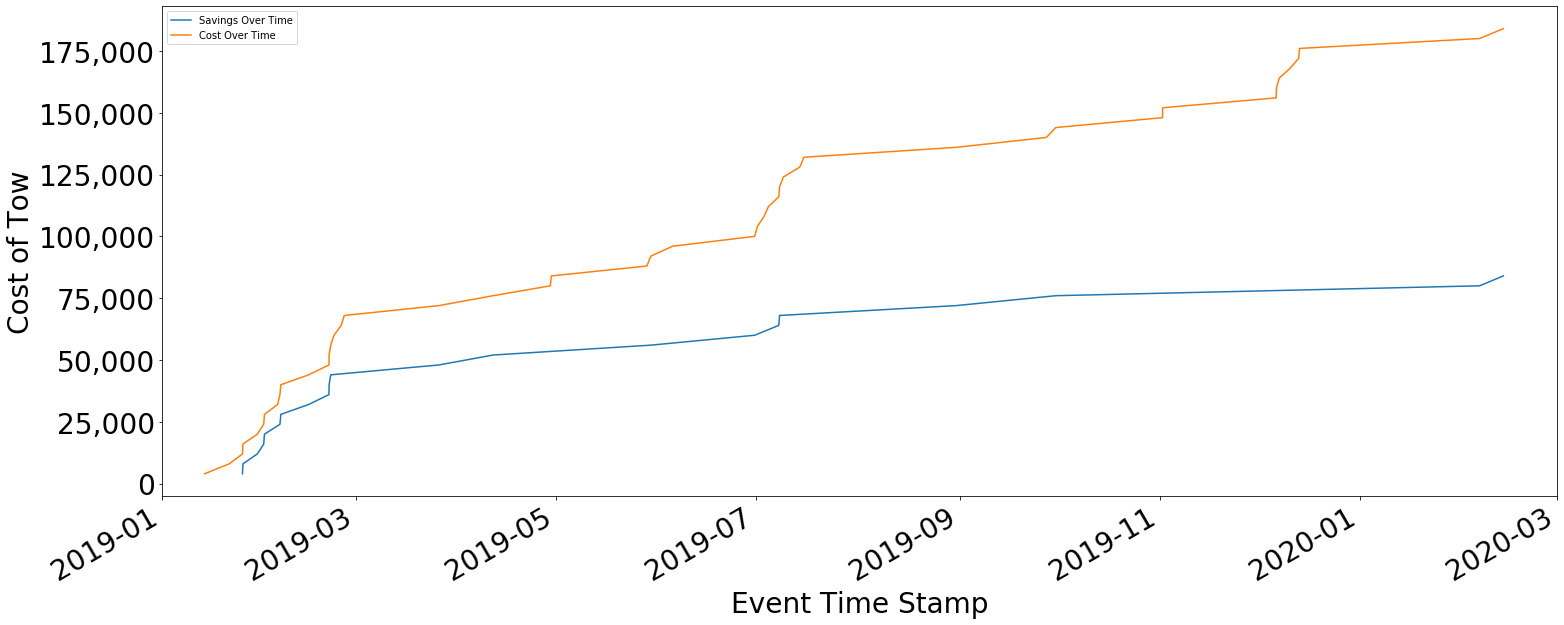

In [168]:
f, ax = plt.subplots(figsize=(25, 10))
#df1 = df1[df1.year > 2018]
df1 = df1.rename(columns={'predicted_rolling_cost': 'Savings Over Time'})
df1.plot('EventTimeStamp', 'Savings Over Time', ax=ax)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlim('2019-01-01 00:00:00','2020-03-01 00:03:23')

df.plot('EventTimeStamp', 'Cost Over Time', ax=ax)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlim('2019-01-01 00:00:00','2020-03-01 00:03:23')


ax.set_ylabel('Cost of Tow', fontsize=28)
ax.set_xlabel('Event Time Stamp', fontsize=28)
ax.tick_params(axis='both', labelsize=28)
plt.savefig('cost vs pred.png', dpi = 250);

In [169]:
df1

,faultValue,Latitude,Longitude,EquipmentID,spn,fmi,EventTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,...,month_cos,year_sin,year_cos,min,max,max_diff,derate_full_in_24h,Cost Over Time,Predicted Values,Savings Over Time
0,NaN,34.118425,-84.741805,1857,5246,0,2019-01-25 10:06:17,0,14.3550,-1,...,1.000000e+00,3.510335e-13,1.0,2019-01-25 10:06:17,2019-01-25 13:27:36,0.0,1,12000,1,4000
1,NaN,35.145972,-86.578981,1857,5246,0,2019-01-25 13:27:36,0,14.4275,-1,...,1.000000e+00,3.510335e-13,1.0,2019-01-25 10:06:17,2019-01-25 13:27:36,0.0,1,16000,1,8000
2,NaN,30.478379,-90.460740,1758,5246,0,2019-01-29 22:35:39,0,14.7900,-1,...,1.000000e+00,3.510335e-13,1.0,2018-10-29 06:41:12,2019-02-06 02:31:49,7.0,1,20000,1,12000
3,NaN,35.137592,-90.487824,1758,5246,0,2019-01-31 21:23:21,0,14.7175,-1,...,1.000000e+00,3.510335e-13,1.0,2018-10-29 06:41:12,2019-02-06 02:31:49,5.0,1,24000,1,16000
4,NaN,33.829120,-93.396157,1758,5246,0,2019-02-01 02:42:48,0,14.5725,-1,...,8.660254e-01,3.510335e-13,1.0,2018-10-29 06:41:12,2019-02-06 02:31:49,4.0,1,28000,1,20000
5,NaN,39.725555,-86.220231,1758,5246,0,2019-02-05 19:59:02,0,14.2825,-1,...,8.660254e-01,3.510335e-13,1.0,2018-10-29 06:41:12,2019-02-06 02:31:49,0.0,1,36000,1,24000
6,NaN,38.491666,-85.769027,1758,5246,0,2019-02-06 02:31:49,0,14.3550,-1,...,8.660254e-01,3.510335e-13,1.0,2018-10-29 06:41:12,2019-02-06 02:31:49,0.0,1,40000,1,28000
7,NaN,36.757500,-86.171157,1961,5246,0,2019-02-14 13:46:15,0,14.1375,-1,...,8.660254e-01,3.510335e-13,1.0,2019-02-14 13:46:15,2019-02-14 13:46:15,0.0,1,44000,1,32000
8,NaN,36.797222,-87.392824,1811,5246,0,2019-02-20 18:24:28,0,14.2825,-1,...,8.660254e-01,3.510335e-13,1.0,2016-07-16 18:06:41,2019-02-20 18:24:28,0.0,1,48000,1,36000
9,NaN,41.147453,-73.254768,1739,5246,0,2019-02-20 19:21:49,0,14.7900,-1,...,8.660254e-01,3.510335e-13,1.0,2018-02-18 18:47:52,2019-02-21 07:17:47,0.0,1,52000,1,40000


In [ ]:
df

In [ ]:
df[df.year<=2018]

In [ ]:
df.shape

In [ ]:
f, ax = plt.subplots(figsize=(25, 10))
#df1 = df1[df1.year > 2018]
df1 = df1.rename(columns={'predicted_rolling_cost': 'Savings Over Time'})
df1.plot('EventTimeStamp', 'Savings Over Time', ax=ax)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlim('2019-01-01 00:00:00','2020-03-01 00:03:23')

df.plot('EventTimeStamp', 'Cost Over Time', ax=ax)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlim('2019-01-01 00:00:00','2020-03-01 00:03:23')


ax.set_ylabel('Cost of Tow', fontsize=28)
ax.set_xlabel('Event Time Stamp', fontsize=28)
ax.tick_params(axis='both', labelsize=28)
plt.savefig('cost vs pred zoom.png', dpi = 250);

In [ ]:
f, ax = plt.subplots(figsize=(25, 10))
#df1 = df1[df1.year > 2018]
df1 = df1.rename(columns={'predicted_rolling_cost': 'Predicted Costs of Tows'})
df1.plot('EventTimeStamp', 'Savings Over Time', ax=ax)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlim('2019-12-01 00:03:23','2019-12-01 00:03:23')

df2 = df2.rename(columns={'rolling_cost_2019': 'Actual Costs of Tows'})
df2.plot('EventTimeStamp', 'Cost Over Time', ax=ax)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlim('2019-12-01 00:03:23','2019-12-01 00:03:23')


ax.set_ylabel('Cost of Tow', fontsize=28)
ax.set_xlabel('Event Time Stamp', fontsize=28)
ax.tick_params(axis='both', labelsize=28)
#plt.savefig('cost vs pred zoom.png', dpi = 250);